In [1]:
import os
import pandas as pd
import requests
import numpy as np
import seaborn as sns
from functools import reduce
from pandas_profiling import ProfileReport
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

Load data

In [2]:
os.getcwd()
df = pd.read_csv("data\\AmesHousingData.csv")

Size, data types and summary of the data 

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.set_option('display.max_columns',200)
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
profile = ProfileReport(df, title = 'Data Profile', html = {'style' : {'full_width': True }}, minimal = True)
profile

Replace NA's based on the data description. Encode the ordinal categories of quality metrics. 

In [6]:
values = {'Alley': 'NoAlley','BsmtFinType2':'NoBasement','BsmtFinType1':'NoBasement', 'Fence':'NoFence','MiscFeature':'None'}
df.fillna(value = values, inplace = True)

In [7]:
df['BsmtExposure'] = df['BsmtExposure'].map({np.nan: 0, 'No': 1, 'Mn': 2, 'Av':3, 'Gd': 4})
df[['BsmtFinType1', 'BsmtFinType2']] = df[['BsmtFinType1', 'BsmtFinType2']].apply(lambda x : x.map({'NoBasement': 0, 'Unf':1, 'LwQ':2,'Rec':3,'BLQ':4, 'ALQ':5, 'GLQ':6}))

In [8]:
df['CentralAir'] = df['CentralAir'].map({'Y':1, 'N':0})
df['Functional'] = df['Functional'].map({'Sal':1,'Sev':1, 'Maj2':2, 'Maj1':2,'Mod':3, 'Min2':4,'Min1':4, 'Typ':5 })

In [9]:
quality_cols = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond','PoolQC']
df[quality_cols] = df[quality_cols].apply(lambda x: x.map({np.nan : 0, 'Po': 1, 'Fa': 2, 'TA':3, 'Gd':4, 'Ex': 5}))

In [10]:
na_cols = df.columns[df.isna().any()]
df.loc[df.isnull().sum(axis = 1) > 0, na_cols]

,LotFrontage,MasVnrType,MasVnrArea,Electrical,GarageType,GarageYrBlt,GarageFinish
7,NaN,Stone,240.0,SBrkr,Attchd,1973.0,RFn
12,NaN,None,0.0,SBrkr,Detchd,1962.0,Unf
14,NaN,BrkFace,212.0,SBrkr,Attchd,1960.0,RFn
16,NaN,BrkFace,180.0,SBrkr,Attchd,1970.0,Fin
24,NaN,None,0.0,SBrkr,Attchd,1968.0,Unf
...,...,...,...,...,...,...,...
1443,NaN,None,0.0,FuseF,Detchd,1916.0,Unf
1446,NaN,BrkFace,189.0,SBrkr,Attchd,1962.0,Unf
1449,21.0,None,0.0,SBrkr,NaN,NaN,NaN
1450,60.0,None,0.0,SBrkr,NaN,NaN,NaN


In [11]:
#GarageYearBuilt
df.GarageYrBlt.fillna(2050, inplace = True)
#df['GarageYrBlt'] = (df.GarageYrBlt//10).astype(int).astype(str)+"0s"

In [12]:
#Other Garage columns
garage_cols = df.columns[df.columns.str.startswith('Garage')]
garage_obj_cols = garage_cols[df[garage_cols].dtypes == object]
df[garage_obj_cols] = df[garage_obj_cols].fillna('NoGarage')
df['GarageFinish'] = df['GarageFinish'].map({'NoGarage':0, 'Unf':1, 'RFn':2, 'Fin':3})

In [13]:
df['Electrical'] = df['Electrical'].fillna(df.Electrical.mode().iloc[0])

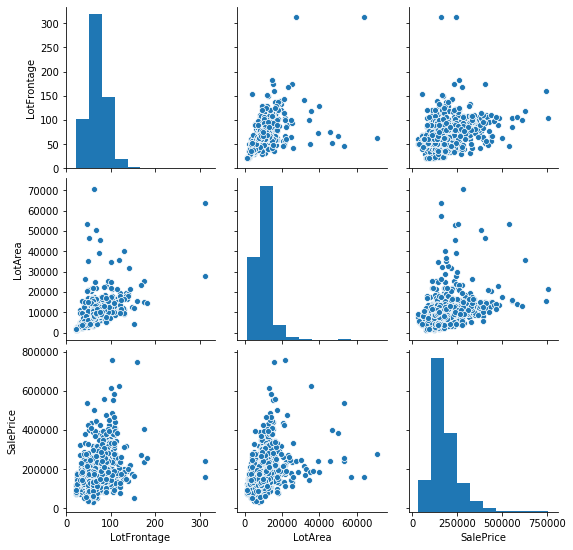

In [14]:
sns.pairplot(df[df.LotArea < 100000], vars = ['LotFrontage', 'LotArea', 'SalePrice'], )

In [15]:
df.loc[:,['LotFrontage', 'LotArea', 'SalePrice']].corr()

,LotFrontage,LotArea,SalePrice
LotFrontage,1.000000,0.426095,0.351799
LotArea,0.426095,1.000000,0.263843
SalePrice,0.351799,0.263843,1.000000


In [16]:
df1 = df[~df.LotFrontage.isna()]
X = df1['LotArea']
y = df1['LotFrontage']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            LotFrontage   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     266.0
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           3.70e-54
Time:                        17:28:42   Log-Likelihood:                -5414.3
No. Observations:                1201   AIC:                         1.083e+04
Df Residuals:                    1199   BIC:                         1.084e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.0550      1.018     56.024      0.000      55.057      59.053
LotArea        0.0013   8.01e-05     16.309      0.000       0.001       0.001
==============================================================================
Omnibus:                      456.762   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14409.128
Skew:                           1.114   Prob(JB):                         0.00
Kurtosis:                      19.822   Cond. No.                     2.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
def frontage_impute(area):
    return model.params[0]+model.params[1]*area
model.params

const      57.055042
LotArea     0.001306
dtype: float64

In [18]:
df.LotFrontage.fillna(df.LotArea.apply(frontage_impute), inplace = True)                                                        

In [19]:
df['MasVnrType'] = df['MasVnrType'].fillna(df.MasVnrType.mode().iloc[0])

In [20]:
df.groupby(['MasVnrType'])['MasVnrArea'].describe()

,count,mean,std,min,25%,50%,75%,max
MasVnrType,,,,,,,,
BrkCmn,15.0,247.666667,182.423239,41.0,91.5,192.0,381.50,621.0
BrkFace,445.0,259.008989,215.137888,0.0,114.0,202.0,336.00,1600.0
None,864.0,1.094907,18.569659,0.0,0.0,0.0,0.00,344.0
Stone,128.0,239.304688,172.129257,0.0,111.5,206.5,296.25,860.0


In [21]:
#setting masonry veneer area = 0 when there is no masonry veneer
df.loc[df.MasVnrType == 'None','MasVnrArea'] = 0 

In [22]:
df['MasVnrArea'] = df.groupby(['MasVnrType'])['MasVnrArea'].transform(lambda x: x.fillna(x.mean()))

In [23]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [24]:
df.to_csv("data\\cleaned_housingprice_data.csv")

Data for US new home mortgage rate was downloaded from the bureau of economic analysis website for years 2000-2010.

In [25]:
intratedf = pd.read_excel("data\\InterestRates_govinfo.xls", header = None)
intratedf.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,Interest Rates and Bond Yields,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[Percent per annum],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Period,U.S. Treasury security yields,NaN,NaN,NaN,High-grade municipal bonds (Standard & Po...,Corporate Aaa bonds (Moody's),Discount window (N.Y. ...,NaN,Prime rate charged by banks 5,Federal funds rate 6,New-home mortgage yields (FHFA) 7
3,NaN,3-month bills (at auction) 1,Constant maturities 2,NaN,NaN,NaN,NaN,Primary credit,Discount rate,NaN,NaN,NaN
4,NaN,NaN,3-year,10-year,30-year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2001.,3.44,4.09,5.02,5.49,5.19,7.08,......,3.4,6.91,3.88,7
6,2002.,1.62,3.1,4.61,5.43,5.05,6.49,......,1.17,4.67,1.67,6.43
7,2003.,1.01,2.1,4.01,*,4.73,5.67,2.12,*,4.12,1.13,5.8
8,2004.,1.38,2.78,4.27,*,4.63,5.63,2.34,*,4.34,1.35,5.77
9,2005.,3.16,3.93,4.29,*,4.29,5.24,4.19,*,6.19,3.22,5.94


In [26]:
intratedf1 = intratedf[[0,11]]
intratedf1.columns = ['Year','New_Home_Mortgage_Rate']
intrate = intratedf1.iloc[5:15].reset_index(drop = True)
intrate

,Year,New_Home_Mortgage_Rate
0,2001.,7
1,2002.,6.43
2,2003.,5.8
3,2004.,5.77
4,2005.,5.94
5,2006.,6.63
6,2007.,6.41
7,2008.,6.05
8,2009.,5.14
9,2010.,4.8


In [27]:
intrate.dtypes
intrate['Year'] = intrate['Year'].astype(float).astype(int)
intrate['New_Home_Mortgage_Rate'] = intrate.New_Home_Mortgage_Rate.astype(float)
intrate

,Year,New_Home_Mortgage_Rate
0,2001,7.00
1,2002,6.43
2,2003,5.80
3,2004,5.77
4,2005,5.94
5,2006,6.63
6,2007,6.41
7,2008,6.05
8,2009,5.14
9,2010,4.80


GDP data for Ames, IA was obtained from open data network via API.

In [28]:
url = "https://odn.data.socrata.com/resource/mkpy-jf3j.json?variable=per_capita_gdp&name=Ames, IA Metro Area"
res = requests.get(url)
json = res.json()
gdpdf = pd.DataFrame(json).sort_values('year').reset_index()
gdp = gdpdf[['year','value']]
gdp.columns = ['Year','Per_Capita_GDP']
#gdp.loc[:,['Year']] = gdp.Year.astype(int)
#gdp.loc[:,['Per_Capita_GDP']] = gdp.Per_Capita_GDP.astype(float)
gdp = gdp.astype(int)
gdp

,Year,Per_Capita_GDP
0,2001,39782
1,2002,38835
2,2003,39441
3,2004,40484
4,2005,41017
5,2006,42288
6,2007,42563
7,2008,45972
8,2009,41445
9,2010,41361


Population data obtained from US Census Bureau via API for years 2000 - 2010

In [29]:
url = 'https://api.census.gov/data/2000/pep/int_population?get=GEONAME,POP,DATE_,DATE_DESC&for=place:01855&in=state:19 county:169'
res = requests.get(url)
json = res.json()
json

[['GEONAME', 'POP', 'DATE_', 'DATE_DESC', 'state', 'county', 'place'],
 ['Ames city, Story County, Iowa',
  '50812',
  '1',
  '4/1/2000 population estimates base',
  '19',
  '169',
  '01855'],
 ['Ames city, Story County, Iowa',
  '50960',
  '2',
  '7/1/2000 population estimate',
  '19',
  '169',
  '01855'],
 ['Ames city, Story County, Iowa',
  '51123',
  '3',
  '7/1/2001 population estimate',
  '19',
  '169',
  '01855'],
 ['Ames city, Story County, Iowa',
  '52652',
  '4',
  '7/1/2002 population estimate',
  '19',
  '169',
  '01855'],
 ['Ames city, Story County, Iowa',
  '52720',
  '5',
  '7/1/2003 population estimate',
  '19',
  '169',
  '01855'],
 ['Ames city, Story County, Iowa',
  '53305',
  '6',
  '7/1/2004 population estimate',
  '19',
  '169',
  '01855'],
 ['Ames city, Story County, Iowa',
  '53512',
  '7',
  '7/1/2005 population estimate',
  '19',
  '169',
  '01855'],
 ['Ames city, Story County, Iowa',
  '55035',
  '8',
  '7/1/2006 population estimate',
  '19',
  '169',
  '0185

In [30]:
popdf1 = pd.DataFrame(json[1:], columns = json[0])
popdf1

,GEONAME,POP,DATE_,DATE_DESC,state,county,place
0,"Ames city, Story County, Iowa",50812,1,4/1/2000 population estimates base,19,169,01855
1,"Ames city, Story County, Iowa",50960,2,7/1/2000 population estimate,19,169,01855
2,"Ames city, Story County, Iowa",51123,3,7/1/2001 population estimate,19,169,01855
3,"Ames city, Story County, Iowa",52652,4,7/1/2002 population estimate,19,169,01855
4,"Ames city, Story County, Iowa",52720,5,7/1/2003 population estimate,19,169,01855
5,"Ames city, Story County, Iowa",53305,6,7/1/2004 population estimate,19,169,01855
6,"Ames city, Story County, Iowa",53512,7,7/1/2005 population estimate,19,169,01855
7,"Ames city, Story County, Iowa",55035,8,7/1/2006 population estimate,19,169,01855
8,"Ames city, Story County, Iowa",56567,9,7/1/2007 population estimate,19,169,01855
9,"Ames city, Story County, Iowa",57477,10,7/1/2008 population estimate,19,169,01855


In [31]:
popdf = popdf1[['DATE_DESC','POP']]
popdf

,DATE_DESC,POP
0,4/1/2000 population estimates base,50812
1,7/1/2000 population estimate,50960
2,7/1/2001 population estimate,51123
3,7/1/2002 population estimate,52652
4,7/1/2003 population estimate,52720
5,7/1/2004 population estimate,53305
6,7/1/2005 population estimate,53512
7,7/1/2006 population estimate,55035
8,7/1/2007 population estimate,56567
9,7/1/2008 population estimate,57477


In [32]:
popdf.loc[:,'Date'] = popdf.DATE_DESC.apply(lambda val: val.split()[0])
Year = pd.to_datetime(popdf.Date).dt.year
Pop = popdf.POP.astype(int)

C:\Users\Navina\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Navina\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
pop = pd.concat([Year, Pop], axis = 1)
pop.columns = ['Year', 'Population']
pop

,Year,Population
0,2000,50812
1,2000,50960
2,2001,51123
3,2002,52652
4,2003,52720
5,2004,53305
6,2005,53512
7,2006,55035
8,2007,56567
9,2008,57477


Employment statistics data was downloaded from iowaworkforcedevelopment.org

In [34]:
empdf = pd.read_csv("data\\Iowa LAUS Data 2020-04_0.csv")
empdf

,STFIPS,AREATYNAME,AREANAME,YEAR,MONTH,ADJUSTED,PRELIM,LABORFORCE,EMP,UNEMP,UNEMPRATE,LABFORCE_PARTRATE
0,19,Micropolitan Statistical Area,"Storm Lake, IA Micropolitan Statistical Area",2017,September,0,0,11240,10970,270,2.4,NaN
1,19,Micropolitan Statistical Area,"Storm Lake, IA Micropolitan Statistical Area",2017,October,0,0,11730,11500,230,1.9,NaN
2,19,Micropolitan Statistical Area,"Storm Lake, IA Micropolitan Statistical Area",2017,November,0,0,11890,11650,240,2.0,NaN
3,19,Micropolitan Statistical Area,"Storm Lake, IA Micropolitan Statistical Area",2017,December,0,0,11660,11420,250,2.1,NaN
4,19,Micropolitan Statistical Area,"Storm Lake, IA Micropolitan Statistical Area",2018,January,0,0,11280,10990,290,2.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
48795,19,Micropolitan Statistical Area,"Spencer, IA Micropolitan Statistical Area",2018,April,0,0,8340,8040,300,3.6,NaN
48796,19,Micropolitan Statistical Area,"Spencer, IA Micropolitan Statistical Area",2018,May,0,0,8420,8190,230,2.8,NaN
48797,19,Micropolitan Statistical Area,"Spencer, IA Micropolitan Statistical Area",2018,June,0,0,8760,8460,300,3.4,NaN
48798,19,Micropolitan Statistical Area,"Spencer, IA Micropolitan Statistical Area",2018,July,0,0,8800,8460,340,3.8,NaN


In [35]:
empdf.columns
empdf.AREATYNAME.unique()
filterby = (empdf['AREATYNAME'] == 'Cities') & (empdf['AREANAME'] == 'Ames') & (empdf['YEAR'] > 2000) & (empdf['YEAR'] <= 2010)
cols = ['YEAR','MONTH','LABORFORCE','EMP','UNEMP','UNEMPRATE']
empdf1 = empdf.loc[filterby, cols]
empdf1

,YEAR,MONTH,LABORFORCE,EMP,UNEMP,UNEMPRATE
34841,2001,January,28300,27600,700,2.6
34842,2001,February,28800,28100,700,2.4
34843,2001,March,29000,28200,800,2.6
34844,2001,April,29000,28400,700,2.2
34845,2001,May,28800,28200,600,2.1
...,...,...,...,...,...,...
35243,2010,August,34400,33000,1400,4.0
35244,2010,September,35900,34700,1200,3.4
35245,2010,October,36000,34900,1100,3.1
35246,2010,November,36100,34900,1200,3.2


In [36]:
empdf1.groupby('YEAR')['MONTH'].nunique()
emp = empdf1.groupby('YEAR').mean().loc[:,['LABORFORCE','UNEMPRATE']].round(1).reset_index()
emp.columns = ['Year','Labor_Force','Unemployment_Rate']
emp.loc[:,['Labor_Force']] = emp.Labor_Force.astype(int)
emp

,Year,Labor_Force,Unemployment_Rate
0,2001,28675,2.4
1,2002,29650,2.9
2,2003,29025,3.2
3,2004,28750,3.3
4,2005,31225,2.7
5,2006,31333,2.4
6,2007,31608,2.5
7,2008,32375,2.9
8,2009,32583,4.2
9,2010,35433,3.7


Median household income data for Story County was downloaded from fred.stlouisfed.org

In [37]:
incdf = pd.read_csv("data\\Median_Income_crosstab_Full_Data_data.csv")
incdf

,Geographic Name,Year,Geographic Level,Year (copy),Lower Bound Confidence Interval,Median Household Income,Number of Records,Upper Bound Confidence Interval
0,Story County,2005,County (Iowa only),2005,"$39,855","$42,414",1,"$44,973"
1,Story County,2006,County (Iowa only),2006,"$42,276","$44,698",1,"$47,121"
2,Story County,2007,County (Iowa only),2007,"$45,933","$49,104",1,"$52,274"
3,Story County,2008,County (Iowa only),2008,"$47,030","$50,265",1,"$53,499"
4,Story County,2009,County (Iowa only),2009,"$44,588","$48,165",1,"$51,743"
5,Story County,2010,County (Iowa only),2010,"$46,649","$49,192",1,"$51,735"


In [38]:
incdf.columns
cols = ['Year', 'Median Household Income']
inc = incdf.loc[:,cols]
inc.columns = ['Year', 'Median_Household_Income']
inc['Median_Household_Income'] = inc['Median_Household_Income'].replace({'\$':'',',':''}, regex = True).astype('int')
inc

,Year,Median_Household_Income
0,2005,42414
1,2006,44698
2,2007,49104
3,2008,50265
4,2009,48165
5,2010,49192


In [39]:
dflist = [intrate, gdp, pop, emp, inc]
df_external = reduce(lambda x, y: pd.merge(x, y, on = 'Year'), dflist)
df_external.dtypes

Year                         int32
New_Home_Mortgage_Rate     float64
Per_Capita_GDP               int32
Population                   int32
Labor_Force                  int32
Unemployment_Rate          float64
Median_Household_Income      int32
dtype: object

In [40]:
df_external.Year = df_external.Year.astype('str')
df_external

,Year,New_Home_Mortgage_Rate,Per_Capita_GDP,Population,Labor_Force,Unemployment_Rate,Median_Household_Income
0,2005,5.94,41017,53512,31225,2.7,42414
1,2006,6.63,42288,55035,31333,2.4,44698
2,2007,6.41,42563,56567,31608,2.5,49104
3,2008,6.05,45972,57477,32375,2.9,50265
4,2009,5.14,41445,58669,32583,4.2,48165
5,2010,4.80,41361,58965,35433,3.7,49192


In [41]:
df_external.to_csv("data\\yearwise_economic_indicators.csv")